C:\Users\Ricardo\AppData\Local\Temp\ipykernel_10692\1833988139.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tabela', y='Tempototal', data=filtered_data_phee, ax=axes[0], showfliers=False, palette=colors)
C:\Users\Ricardo\AppData\Local\Temp\ipykernel_10692\1833988139.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tabela', y='Tempototal', data=filtered_data_trill, ax=axes[1], showfliers=False, palette=colors)


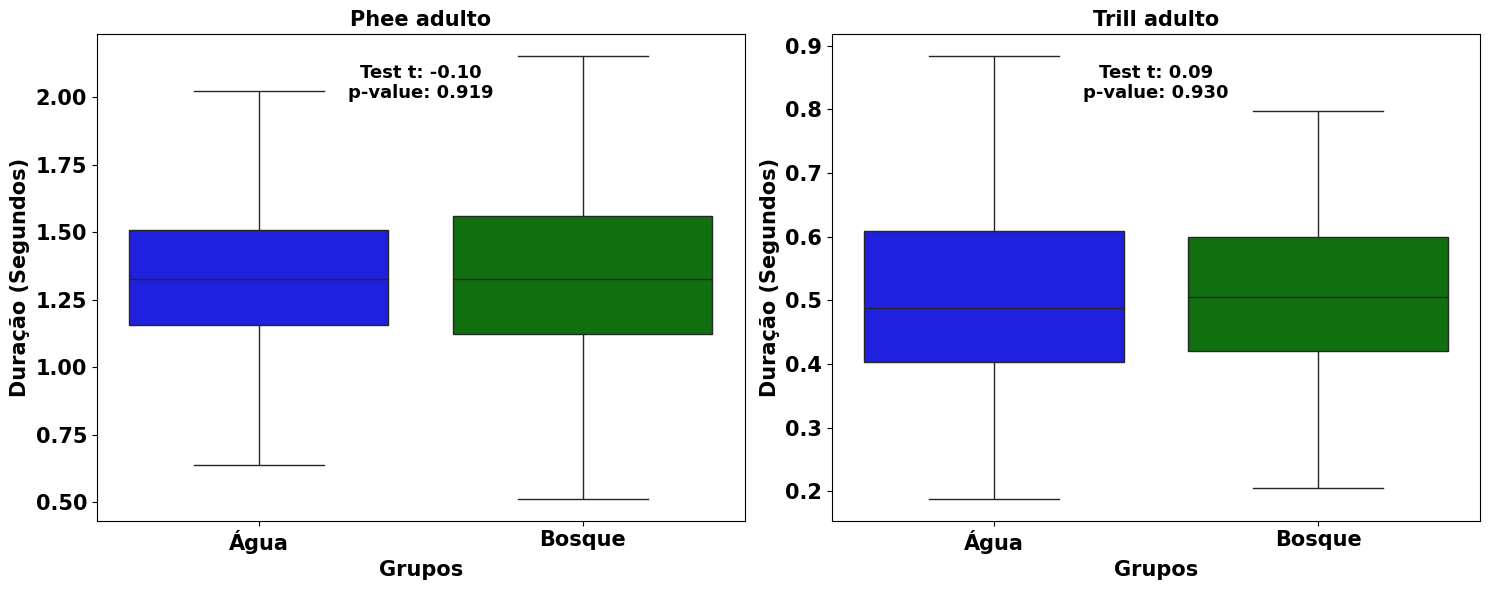

In [1]:
#código comparação phee e trill ano 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import calendar
import numpy as np
from scipy.stats import ttest_ind


# Carregando os arquivos Excel
excel_file1 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Agua_bb_adulto.xlsx'
excel_file2 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Bosque_bb_adulto.xlsx'

# Lista de abas para a primeira tabela
abas_agua = ['Gravador 01', 'Gravador 04', 'Gravador 05', 'Gravador 06']

# Lista de abas para a segunda tabela
abas_bosque = ['Gravador 01', 'Gravador 03', 'Gravador 04', 'Gravador 06', 'Gravador 07', 'Gravador 09']

# Lista para armazenar os dataframes de cada aba da primeira tabela
df_agua = []

# Lista para armazenar os dataframes de cada aba da segunda tabela
df_bosque = []

# Carregando os DataFrames de cada aba da primeira tabela
for aba in abas_agua:
    df_temp = pd.read_excel(excel_file1, sheet_name=aba)
    df_temp['Tabela'] = 'Água'
    df_agua.append(df_temp)

# Carregando os DataFrames de cada aba da segunda tabela
for aba in abas_bosque:
    df_temp = pd.read_excel(excel_file2, sheet_name=aba)
    df_temp['Tabela'] = 'Bosque'
    df_bosque.append(df_temp)

# Concatenando todos os dataframes das duas tabelas em um único dataframe
combined_df_agua = pd.concat(df_agua, ignore_index=True)
combined_df_bosque = pd.concat(df_bosque, ignore_index=True)

# Concatenando todos os dataframes das duas tabelas em um único dataframe
combined_df_agua = pd.concat(df_agua, ignore_index=True)
combined_df_bosque = pd.concat(df_bosque, ignore_index=True)

# Concatenando todos os dataframes das duas tabelas em um único dataframe
combined_df = pd.concat([combined_df_agua, combined_df_bosque], ignore_index=True)

# Convertendo a coluna de Data para o formato de data
combined_df['Data'] = pd.to_datetime(combined_df['Data'], format='%d/%m/%y')

# Convertendo a coluna 'Hora' para o tipo datetime
combined_df['Hora'] = pd.to_datetime(combined_df['Hora'], format='%H:%M:%S')

# Filtrando os dados para 'phee'
filtered_data_phee = combined_df[(combined_df['Classificacao'] == 'phee adulto') & 
                                  (((combined_df['Hora'].dt.hour >= 4) & 
                                    (combined_df['Hora'].dt.hour <= 12)) | 
                                   ((combined_df['Hora'].dt.hour >= 13) & 
                                    (combined_df['Hora'].dt.hour <= 16)))]

# Filtrando os dados para 'trill'
filtered_data_trill = combined_df[(combined_df['Classificacao'] == 'trill adulto') & 
                                   (((combined_df['Hora'].dt.hour >= 4) & 
                                     (combined_df['Hora'].dt.hour <= 12)) | 
                                    ((combined_df['Hora'].dt.hour >= 13) & 
                                     (combined_df['Hora'].dt.hour <= 16)))]
# Criando subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Definindo as cores para 'Água' e 'Bosque'
colors = {'Água': 'blue', 'Bosque': 'green'}

# Boxplot para 'phee' (subplot 0)
sns.boxplot(x='Tabela', y='Tempototal', data=filtered_data_phee, ax=axes[0], showfliers=False, palette=colors)
axes[0].set_title(f'Phee adulto', weight='bold', fontsize=15)
axes[0].set_xlabel('Grupos', weight='bold', fontsize=15)
axes[0].set_ylabel('Duração (Segundos)', weight='bold', fontsize=15)
plt.setp(axes[0].get_xticklabels(), fontsize=15, weight='bold')
plt.setp(axes[0].get_yticklabels(), fontsize=15, weight='bold')

# Boxplot para 'trill' (subplot 1)
sns.boxplot(x='Tabela', y='Tempototal', data=filtered_data_trill, ax=axes[1], showfliers=False, palette=colors)
axes[1].set_title(f'Trill adulto', weight='bold', fontsize=15)
axes[1].set_xlabel('Grupos',weight='bold', fontsize=15)
axes[1].set_ylabel('Duração (Segundos)', weight='bold', fontsize=15)
plt.setp(axes[1].get_xticklabels(), fontsize=15, weight='bold')
plt.setp(axes[1].get_yticklabels(), fontsize=15, weight='bold')

# Realizando o teste t de Student para 'phee' entre os grupos 'Água' e 'Bosque'
t_statistic_phee, p_value_phee = ttest_ind(filtered_data_phee[filtered_data_phee['Tabela'] == 'Água']['Tempototal'],
                                           filtered_data_phee[filtered_data_phee['Tabela'] == 'Bosque']['Tempototal'])

# Realizando o teste t de Student para 'trill' entre os grupos 'Água' e 'Bosque'
t_statistic_trill, p_value_trill = ttest_ind(filtered_data_trill[filtered_data_trill['Tabela'] == 'Água']['Tempototal'],
                                             filtered_data_trill[filtered_data_trill['Tabela'] == 'Bosque']['Tempototal'])

# Anotando os resultados dos testes t nos gráficos
axes[0].annotate(f'Test t: {t_statistic_phee:.2f}\np-value: {p_value_phee:.3f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', va='center', weight='bold', fontsize=13)
axes[1].annotate(f'Test t: {t_statistic_trill:.2f}\np-value: {p_value_trill:.3f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', va='center',weight='bold', fontsize=13)

# Ajustando o layout
plt.tight_layout()
# plt.savefig(r'G:\Meu Drive\Mestrado\Triagem dos dados\imagens\Boxplot adulto.png', bbox_inches='tight')

# Exibindo os subplots
plt.show()

In [ ]:
#boxplot comparando das vocalizações ao longo das estações seca e chuvosa e teste t 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Carregando os arquivos Excel
excel_file1 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Agua_bb_adulto.xlsx'
excel_file2 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Bosque_bb_adulto.xlsx'

# Lista de abas para cada tabela
abas_agua = ['Gravador 01', 'Gravador 04', 'Gravador 05', 'Gravador 06']
abas_bosque = ['Gravador 01', 'Gravador 03', 'Gravador 04', 'Gravador 06', 'Gravador 07', 'Gravador 09']

# Lista para armazenar os dataframes de cada aba
df_agua = []
df_bosque = []

# Carregando os DataFrames de cada aba da tabela Água
for aba in abas_agua:
    df_temp = pd.read_excel(excel_file1, sheet_name=aba)
    df_temp['Tabela'] = 'Água'
    df_agua.append(df_temp)

# Carregando os DataFrames de cada aba da tabela Bosque
for aba in abas_bosque:
    df_temp = pd.read_excel(excel_file2, sheet_name=aba)
    df_temp['Tabela'] = 'Bosque'
    df_bosque.append(df_temp)

# Concatenando os dataframes em um único dataframe para cada tabela
combined_df_agua = pd.concat(df_agua, ignore_index=True)
combined_df_bosque = pd.concat(df_bosque, ignore_index=True)

# Concatenando os dataframes das duas tabelas em um único dataframe
combined_df = pd.concat([combined_df_agua, combined_df_bosque], ignore_index=True)

# Convertendo a coluna de Data para o formato de data
combined_df['Data'] = pd.to_datetime(combined_df['Data'], format='%d/%m/%y')

# Filtrando pela vocalização 'phee adulto' e 'trill adulto'
limite_tempo_vocalizacao = 0.0
phee_data = combined_df[(combined_df['Classificacao'] == 'phee adulto') & (combined_df['Tempototal'] > limite_tempo_vocalizacao)].copy()
trill_data = combined_df[(combined_df['Classificacao'] == 'trill adulto') & (combined_df['Tempototal'] > limite_tempo_vocalizacao)].copy()

# Criando uma coluna 'Mês' para armazenar o mês de cada data
phee_data['Mês'] = phee_data['Data'].dt.month
trill_data['Mês'] = trill_data['Data'].dt.month

# Criando uma coluna 'Período' para categorizar os meses
phee_data['Período'] = 'Seca'
phee_data.loc[phee_data['Mês'].between(3, 7), 'Período'] = 'Chuvoso'
trill_data['Período'] = 'Seca'
trill_data.loc[trill_data['Mês'].between(3, 7), 'Período'] = 'Chuvoso'

# Criando uma paleta de cores personalizada para cada tabela
paleta_cores = {'Água': 'blue', 'Bosque': 'green'}

# Criando subplots
plt.figure(figsize=(16, 8))

# Boxplot para Phee Adulto (Set-Jan e Mar-Jul)
plt.subplot(1, 2, 1)
sns.boxplot(x='Período', y='Tempototal', hue='Tabela', data=phee_data, palette=paleta_cores, showfliers=False, gap=.1)
plt.title('Phee Adulto', weight='bold', fontsize=15)

plt.xlim(-0.5, 1.5)
plt.ylim(0,3)
# Adicionando retângulos para indicar estações seca e chuvosa no subplot phee Adulto
plt.axvspan(-0.5, 0.5, facecolor='yellow', alpha=0.1, label='Estação Seca', edgecolor='black')  # Estação Seca
plt.axvspan(0.5, 1.5, facecolor='blue', alpha=0.1, label='Estação Chuvosa', edgecolor='black')  # Estação Chuvosa

# Remover as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.ylabel('Duração (segundos)', weight='bold', fontsize=20)
plt.xlabel('Período', weight='bold', fontsize=15)
plt.xticks( weight='bold', fontsize=15)  # Configurando os ticks e labels
plt.yticks( weight='bold', fontsize=15)

# Realizando o teste t entre os boxplots dos meses Set-Jan para os dois grupos (Phee Adulto)
tabela1_data_phee = phee_data[(phee_data['Período'] == 'Seca') & (phee_data['Tabela'] == 'Água')]['Tempototal']
tabela2_data_phee = phee_data[(phee_data['Período'] == 'Seca') & (phee_data['Tabela'] == 'Bosque')]['Tempototal']
_, p_value_set_jan_phee = ttest_ind(tabela1_data_phee, tabela2_data_phee)

# Realizando o teste t entre os boxplots dos meses Mar-Jul para os dois grupos (Phee Adulto)
tabela1_data_phee = phee_data[(phee_data['Período'] == 'Chuvoso') & (phee_data['Tabela'] == 'Água')]['Tempototal']
tabela2_data_phee = phee_data[(phee_data['Período'] == 'Chuvoso') & (phee_data['Tabela'] == 'Bosque')]['Tempototal']
_, p_value_mar_jul_phee = ttest_ind(tabela1_data_phee, tabela2_data_phee)

# Adicionando p-values no gráfico para Phee Adulto
plt.text(0.33, 0.95, f'p-value Set-Jan: {p_value_set_jan_trill:.4f}', ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5), weight='bold', fontsize=12)
plt.text(0.52, 0.95, f'p-value Mar-Jul: {p_value_mar_jul_trill:.4f}', ha='left', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5), weight='bold', fontsize=12)

# Boxplot para Trill Adulto (Set-Jan e Mar-Jul)
plt.subplot(1, 2, 2)
sns.boxplot(x='Período', y='Tempototal', hue='Tabela', data=trill_data, palette=paleta_cores, showfliers=False, gap=.1)
plt.title('Trill Adulto',weight='bold', fontsize=15)

# Definindo os limites do eixo x para iniciar no limite esquerdo do retângulo amarelo
plt.xlim(-0.5, 1.5)
plt.ylim(0,1)
# Adicionando retângulos para indicar estações seca e chuvosa no subplot Trill Adulto
plt.axvspan(-0.5, 0.5, facecolor='y', alpha=0.1, label='Estação Seca', edgecolor='black')  # Estação Seca
plt.axvspan(0.5, 1.5, facecolor='b', alpha=0.1, label='Estação Chuvosa', edgecolor='black')  # Estação Chuvosa

# Remover as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Realizando o teste t entre os boxplots dos meses Set-Jan para os dois grupos (Trill Adulto)
tabela1_data_trill = trill_data[(trill_data['Período'] == 'Seca') & (trill_data['Tabela'] == 'Água')]['Tempototal']
tabela2_data_trill = trill_data[(trill_data['Período'] == 'Seca') & (trill_data['Tabela'] == 'Bosque')]['Tempototal']
_, p_value_set_jan_trill = ttest_ind(tabela1_data_trill, tabela2_data_trill)

# Realizando o teste t entre os boxplots dos meses Mar-Jul para os dois grupos (Trill Adulto)
tabela1_data_trill = trill_data[(trill_data['Período'] == 'Chuvoso') & (trill_data['Tabela'] == 'Água')]['Tempototal']
tabela2_data_trill = trill_data[(trill_data['Período'] == 'Chuvoso') & (trill_data['Tabela'] == 'Bosque')]['Tempototal']
_, p_value_mar_jul_trill = ttest_ind(tabela1_data_trill, tabela2_data_trill)

# Adicionando p-values no gráfico para Trill Adulto
plt.text(0.33, 0.95, f'p-value Set-Jan: {p_value_set_jan_trill:.4f}', ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5), weight='bold', fontsize=12)
plt.text(0.52, 0.95, f'p-value Mar-Jul: {p_value_mar_jul_trill:.4f}', ha='left', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5), weight='bold', fontsize=12)

# Adicionando título e rótulos
plt.suptitle('Comparação entre o grupo Água e Bosque', weight='bold', fontsize=20)
plt.xlabel('Período', weight='bold', fontsize=15)
plt.ylabel('', weight='bold', fontsize=12)
plt.xticks( weight='bold', fontsize=15)  # Configurando os ticks e labels
plt.yticks( weight='bold', fontsize=15)
# Ajustando o layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Ajustando o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.1)


# plt.savefig(r'G:\Meu Drive\Mestrado\Triagem dos dados\imagens\boxplot_comparação phee e trill grupos.png', bbox_inches='tight')

# Exibindo o gráfico
plt.show()